In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import os
import warnings
%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')

In [3]:
DATA_PATH = os.path.join(os.getcwd(),'data','car_evaluation.csv')
df = pd.read_csv(DATA_PATH)
df.head()

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

In [4]:
df.shape

(1727, 7)

In [5]:
df.isna().sum()

vhigh      0
vhigh.1    0
2          0
2.1        0
small      0
low        0
unacc      0
dtype: int64

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [8]:
df.head()

buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc

In [9]:
for c in df.columns:
    print(f' Vaue Counts Of {c} is {df[c].value_counts()} ')

 Vaue Counts Of buying is buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 
 Vaue Counts Of maint is maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64 
 Vaue Counts Of doors is doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64 
 Vaue Counts Of persons is persons
4       576
more    576
2       575
Name: count, dtype: int64 
 Vaue Counts Of lug_boot is lug_boot
med      576
big      576
small    575
Name: count, dtype: int64 
 Vaue Counts Of safety is safety
med     576
high    576
low     575
Name: count, dtype: int64 
 Vaue Counts Of class is class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64 


In [10]:
df.sample()

buying maint doors persons lug_boot safety  class
160  vhigh  high     3    more      big   high  unacc

In [11]:
X = df.drop(['class'],axis=1)
y = df['class']

In [12]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1722     good
1723    vgood
1724    unacc
1725     good
1726    vgood
Name: class, Length: 1727, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

In [16]:
import category_encoders as ce

In [17]:
list(df.columns)

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [18]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [19]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [20]:
X_train.sample()

buying  maint  doors  persons  lug_boot  safety
1       1      1      4        1         2       3

## Gini

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf_gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

In [23]:
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [24]:
y_pred_gini = clf_gini.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8053


In [27]:
print(f'Train Score {clf_gini.score(X_train,y_train)}')

Train Score 0.7847882454624028


In [28]:
print(f'Test Score {clf_gini.score(X_test,y_test)}')

Test Score 0.8052631578947368


## visulize Decsion tree

In [29]:
from sklearn import tree

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

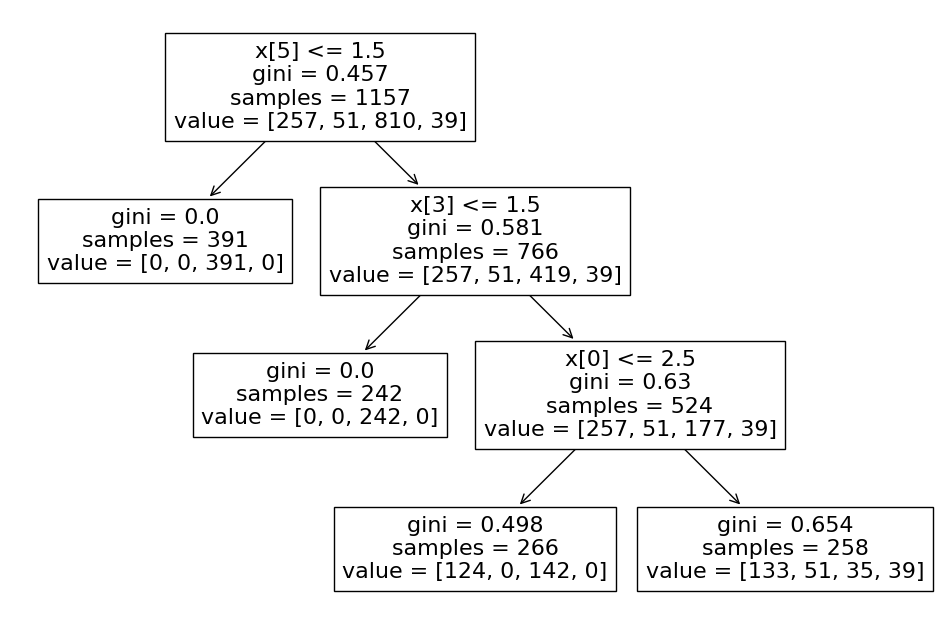

In [30]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_gini.fit(X_train,y_train))

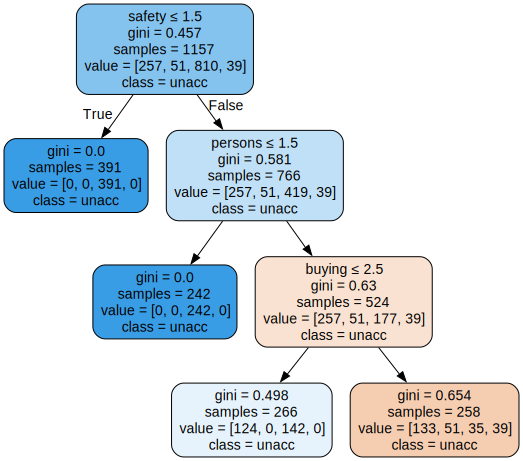

In [31]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

## Entropy

In [32]:
clf_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0)

In [34]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [36]:
y_pred_en = clf_entropy.predict(X_test)

In [38]:
clf_entropy.score(X_train,y_train)

0.7847882454624028

In [39]:
clf_entropy.score(X_test,y_test)

0.8052631578947368

In [41]:
accuracy_score(y_test,y_pred_en)

0.8052631578947368

[Text(0.3333333333333333, 0.875, 'x[5] <= 1.5\nentropy = 1.206\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.5\nentropy = 1.484\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(0.6666666666666666, 0.375, 'x[0] <= 2.5\nentropy = 1.639\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(0.5, 0.125, 'entropy = 0.997\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(0.8333333333333334, 0.125, 'entropy = 1.758\nsamples = 258\nvalue = [133, 51, 35, 39]')]

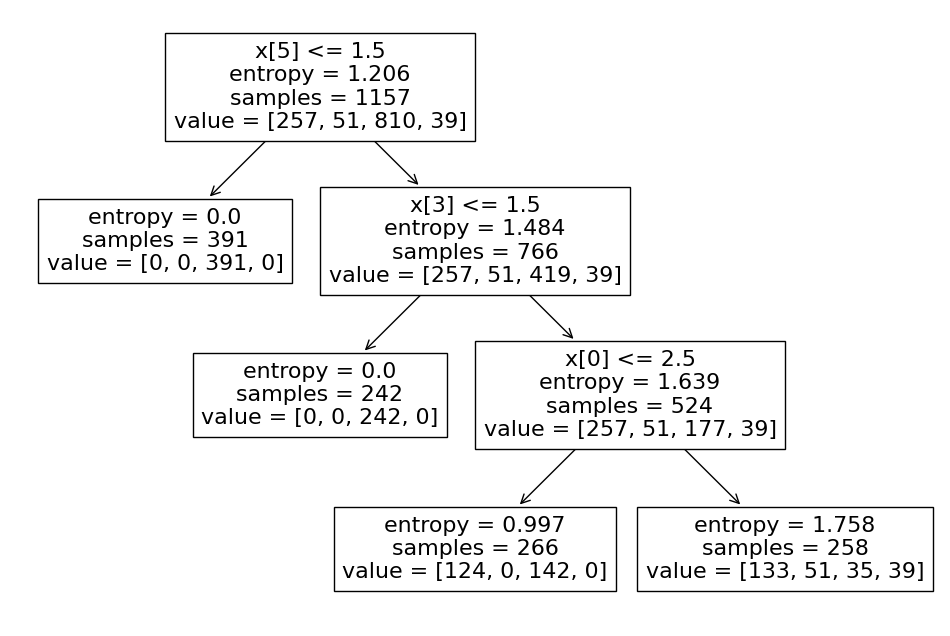

In [42]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf_entropy.fit(X_train, y_train))

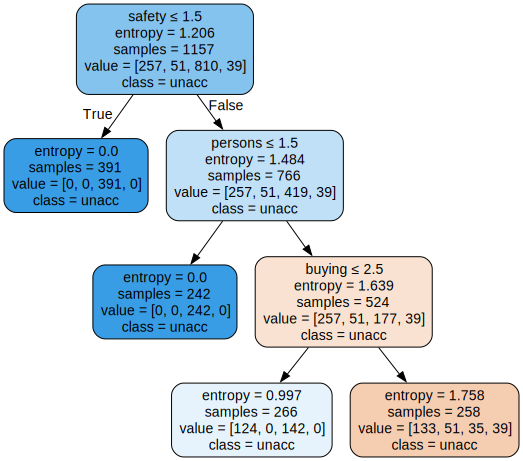

In [43]:
import graphviz 
dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 